# **CMPE 257 Project Milestone 2**
## **Team 8**

**Installing and importing all required libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


**Importing data from CSV file using read_csv()**

In [ ]:
covid = pd.read_csv("WHO-COVID-19-global-data.csv")
covid.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


**Preprocessing the data to extract New cases and Cumulative cases for a specific country**

In [ ]:
india = covid.loc[covid['Country'] == 'India']

In [ ]:
india = india[['Date_reported', 'New_cases', 'Cumulative_cases']].reset_index()
india = india[['Date_reported', 'New_cases', 'Cumulative_cases']]
india

,Date_reported,New_cases,Cumulative_cases
0,2020-01-03,0,0
1,2020-01-04,0,0
2,2020-01-05,0,0
3,2020-01-06,0,0
4,2020-01-07,0,0
...,...,...,...
1025,2022-10-24,1334,44644076
1026,2022-10-25,862,44644938
1027,2022-10-26,830,44645768
1028,2022-10-27,1112,44646880


**Dividing the data into training and testing data (approx 80:20)**

In [ ]:
newC = india['New_cases'][:800]
cumC = india['Cumulative_cases'][:800]

newCtest = india['New_cases'][800:]

cumCtest = india['Cumulative_cases'][800:].reset_index()
cumCtest = cumCtest['Cumulative_cases']

miss1 = india['Cumulative_cases']
miss1

df = pd.DataFrame({'date':pd.date_range('2020-01-03', periods=len(miss1)), 'cases':miss1})
df['date'] = df['date'].astype(int)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  del sys.path[0]


**Dividing the data in frames and appending in a list for time series forecasting**

In [ ]:
from numpy import array

X, y = list(), list()
for i in range(0,len(cumC),1):
  # find the end of this pattern
  end_ix = i + 3
  # check if we are beyond the sequence
  if end_ix > len(cumC)-1:
    break
  # gather input and output parts of the pattern
  seq_x, seq_y = cumC[i:end_ix], cumC[end_ix]
  X.append(seq_x)
  y.append(seq_y)



X = array(X) 
y = array(y)

# for i in range(len(X)):
# 	print(X[i], y[i])
X

array([[       0,        0,        0],
       [       0,        0,        0],
       [       0,        0,        0],
       ...,
       [42967315, 42971308, 42975883],
       [42971308, 42975883, 42980067],
       [42975883, 42980067, 42984261]])

In [ ]:
from numpy import array

Xtest, ytest = list(), list()
for i in range(len(cumCtest)):
  # find the end of this pattern
  end_ix = i + 3
  # check if we are beyond the sequence
  if end_ix > len(cumCtest)-1:
    break
  # gather input and output parts of the pattern
  seq_x, seq_y = cumCtest[i:end_ix], cumCtest[end_ix]
  Xtest.append(seq_x)
  ytest.append(seq_y)



Xtest = array(Xtest) 
ytest = array(ytest)
actual = ytest
# for i in range(len(X)):
	# print(X[i], y[i])
 
# print(len(actual))
# actual

# **ARIMA**

**Creating the ARIMA model and showing the results in a plot**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Test RMSE: 49985.751


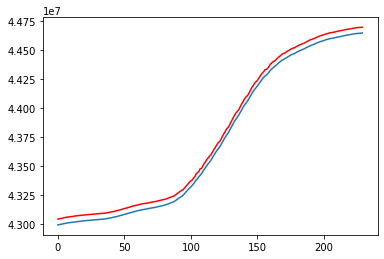

In [ ]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

history = [x for x in cumC]
predictions = list()
# walk-forward validation
for t in range(len(cumCtest)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat+50000)
	obs = cumCtest[t]
	history.append(obs)
	# print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(cumCtest, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(cumCtest)
pyplot.plot(predictions, color='red')
pyplot.show()